In [33]:
import matplotlib.pyplot as plt
import numpy as np
import os

from neurobiases.utils import process_tc_double_results
from pratplot import colorbar
%matplotlib inline

In [2]:
base_path = os.path.join(os.environ['HOME'], 'fits/neurobiases')

In [3]:
results_path = os.path.join(base_path, 'bias_analysis_coupling_tuning.npz')

In [4]:
results = np.load(results_path)

In [5]:
list(results)

['a_trues', 'b_trues', 'a_hats', 'b_hats']

In [8]:
a_trues, b_trues, a_bias, b_bias, a_bias_norm, b_bias_norm = process_tc_double_results(results)

In [10]:
a_bias_avg = np.median(np.median(np.mean(a_bias, axis=3), axis=-1), axis=-1)
b_bias_avg = np.median(np.median(np.mean(b_bias, axis=3), axis=-1), axis=-1)

In [22]:
a_bias_avg_norm = np.median(np.median(np.mean(a_bias_norm, axis=3), axis=-1), axis=-1)
b_bias_avg_norm = np.median(np.median(np.mean(b_bias_norm, axis=3), axis=-1), axis=-1)

In [11]:
a_hyps = np.linspace(-3, 3, 20)
b_hyps = np.linspace(-3, 3, 20)

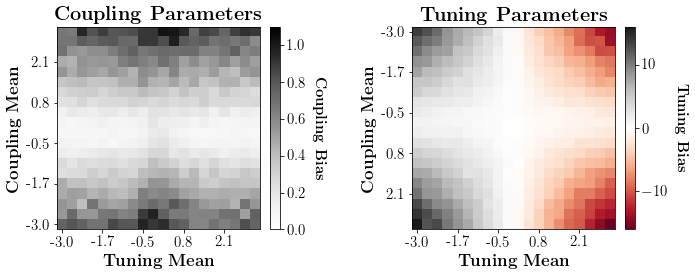

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.subplots_adjust(wspace=0.75)

img1 = axes[0].imshow(
    a_bias_avg,
    vmin=0,
    vmax=1.1,
    cmap='Greys',
    interpolation=None,
    origin='lower')
img2 = axes[1].imshow(
    b_bias_avg,
    vmin=-16,
    vmax=16,
    cmap='RdGy',
    interpolation=None,
    origin='upper')

cb1, _ = colorbar.append_colorbar_to_axis(axes[0], img1)
cb2, _ = colorbar.append_colorbar_to_axis(axes[1], img2)

axes[0].set_title(r'\textbf{Coupling Parameters}', fontsize=20)
axes[1].set_title(r'\textbf{Tuning Parameters}', fontsize=20)

for ax in axes:
    ticks = np.linspace(0, 20, 5, endpoint=False, dtype='int')
    ax.tick_params(labelsize=15)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(np.round(a_hyps[ticks], decimals=1))
    ax.set_yticklabels(np.round(b_hyps[ticks], decimals=1))
    ax.set_xlabel(r'\textbf{Tuning Mean}', fontsize=17)
    ax.set_ylabel(r'\textbf{Coupling Mean}', fontsize=17)
    
cb1.ax.tick_params(labelsize=15)
cb1.set_label(r'\textbf{Coupling Bias}', fontsize=15, rotation=270, labelpad=20)
cb2.ax.tick_params(labelsize=15)
cb2.set_label(r'\textbf{Tuning Bias}', fontsize=15, rotation=270, labelpad=20)

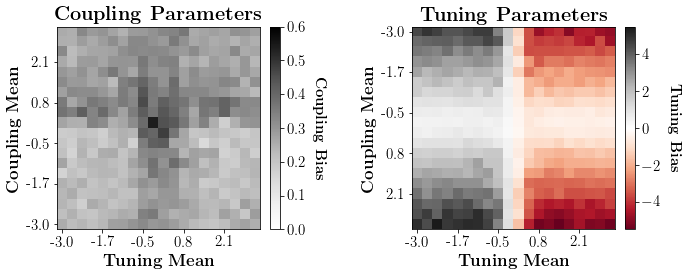

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plt.subplots_adjust(wspace=0.75)

img1 = axes[0].imshow(
    a_bias_avg_norm,
    vmin=0,
    vmax=0.60,
    cmap='Greys',
    interpolation=None,
    origin='lower')
img2 = axes[1].imshow(
    b_bias_avg_norm,
    vmin=-5.5,
    vmax=5.5,
    cmap='RdGy',
    interpolation=None,
    origin='upper')

cb1, _ = colorbar.append_colorbar_to_axis(axes[0], img1)
cb2, _ = colorbar.append_colorbar_to_axis(axes[1], img2)

axes[0].set_title(r'\textbf{Coupling Parameters}', fontsize=20)
axes[1].set_title(r'\textbf{Tuning Parameters}', fontsize=20)

for ax in axes:
    ticks = np.linspace(0, 20, 5, endpoint=False, dtype='int')
    ax.tick_params(labelsize=15)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(np.round(a_hyps[ticks], decimals=1))
    ax.set_yticklabels(np.round(b_hyps[ticks], decimals=1))
    ax.set_xlabel(r'\textbf{Tuning Mean}', fontsize=17)
    ax.set_ylabel(r'\textbf{Coupling Mean}', fontsize=17)
    
cb1.ax.tick_params(labelsize=15)
cb1.set_label(r'\textbf{Coupling Bias}', fontsize=15, rotation=270, labelpad=20)
cb2.ax.tick_params(labelsize=15)
cb2.set_label(r'\textbf{Tuning Bias}', fontsize=15, rotation=270, labelpad=20)